C:\Users\Pablo\AppData\Local\Temp\ipykernel_11524\2136592971.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("turbo", 12)


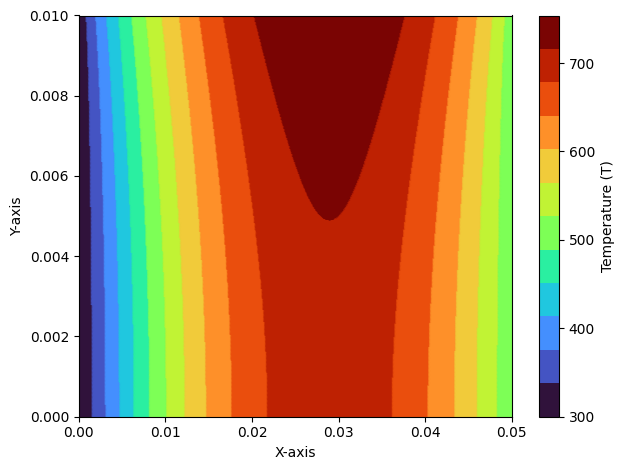

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

W = 0.05
H = 0.01
k = 10
q_flux = 1e5
Tr = 500
Tl = 300

x_pos = np.linspace(0, W, 500)
y_pos = np.linspace(0, H, 500)

domain_x, domain_y = np.meshgrid(x_pos, y_pos)

Ta = (Tr - Tl) * domain_x / W

n_eigenvalues = 100
i = np.array([i + 1 for i in range(n_eigenvalues)])
eigenvectors = np.pi * i / W

I1i = W / 2
I2i = -W * (-1 + (-1) ** i) / (i * np.pi)
Ci = q_flux * I2i / (k * eigenvectors * np.sinh(eigenvectors * H) * I1i)
Tb = sum(
    ci * np.sin(ei * domain_x) * np.cosh(ei * domain_y)
    for ci, ei in zip(Ci, eigenvectors)
)
T = Ta + Tb + Tl

cmap = plt.cm.get_cmap("turbo", 12)
sc = plt.scatter(domain_x, domain_y, c=T, cmap=cmap, s=2)
plt.xlim((domain_x.min(), domain_x.max()))
plt.ylim((domain_y.min(), domain_y.max()))

plt.ylabel("Y-axis")
plt.xlabel("X-axis")
cbar = plt.colorbar(sc)
cbar.set_label("Temperature (T)")
plt.tight_layout()
plt.show()